In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

img_gen = ImageDataGenerator(rotation_range=50,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            zoom_range=0.1,
                            shear_range=0.2,
                            fill_mode='nearest',
                            horizontal_flip=True)

train_set_gen = img_gen.flow_from_directory('E:\\Data\\Manan\\CNN_DATASET\\dataset\\training_set',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

test_set_gen = img_gen.flow_from_directory('E:\\Data\\Manan\\CNN_DATASET\\dataset\\test_set',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# model.summary()

result = model.fit_generator(train_set_gen,
                   steps_per_epoch=8000,
                   epochs=20,
                   validation_data=test_set_gen,
                   validation_steps=2000)

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 8134s 1s/step - loss: 0.5373 - acc: 0.7162 - val_loss: 0.4455 - val_acc: 0.7965
Epoch 2/20
8000/8000 [==============================] - 8223s 1s/step - loss: 0.3829 - acc: 0.8269 - val_loss: 0.3637 - val_acc: 0.8435
Epoch 3/20
8000/8000 [==============================] - 8301s 1s/step - loss: 0.3110 - acc: 0.8654 - val_loss: 0.3313 - val_acc: 0.8612
Epoch 4/20
8000/8000 [==============================] - 8422s 1s/step - loss: 0.2698 - acc: 0.8847 - val_loss: 0.2973 - val_acc: 0.8781
Epoch 5/20
8000/8000 [==============================] - 8531s 1s/step - loss: 0.2427 - acc: 0.8976 - val_loss: 0.3128 - val_acc: 0.8761
E

<h2>Save Model</h2>

In [1]:
# model.save('CatsDogs_85.h5')
model

NameError: name 'model' is not defined

<h2>Plot Accuracy History</h2>

<bound method Callback.on_train_end of <keras.callbacks.History object at 0x000001C438789EB8>>

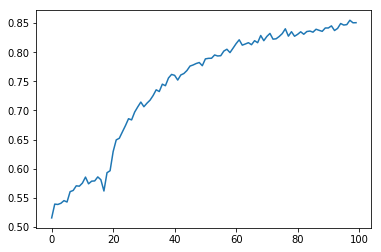

In [23]:
import matplotlib.pyplot as plt
plt.plot(result.history['acc'])

<h2>Test the model</h2>

In [40]:
dog_file = 'E:\\Data\\Manan\\CNN_DATASET\\dataset\\test_set\\cats\\cat.4123.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(dog_file, target_size = (150,150))
img = image.img_to_array(img)
img  = np.expand_dims(img, axis = 0)
img = img/255
model.predict_classes(img)

array([[0]])

In [41]:
model.predict(img)

array([[0.0747487]], dtype=float32)

In [47]:
images_array = list()
for i in range(4001,4051):
    dog = 'E:\\Data\\Manan\\CNN_DATASET\\dataset\\test_set\\cats\\cat.'+str(i)+'.jpg'
    img = image.load_img(dog, target_size = (150,150))
    img = image.img_to_array(img)
    img = img/255
    images_array.append(img)
images_final = np.array(images_array)

In [48]:
predictions = model.predict_classes(images_final)

In [52]:
# predictions

In [50]:
predictions_prob = model.predict(images_final)

In [53]:
# predictions_prob

In [54]:
# Using a prebuilt model by trainer
from keras.models import load_model
trainersModel = load_model('DATA/cat_dog_100epochs.h5')

In [55]:
predictions2 = trainersModel.predict_classes(images_final)

In [57]:
# predictions2
predictions_prob2 = trainersModel.predict(images_final)

In [58]:
predictions_prob2

array([[0.8496556 ],
       [0.5116209 ],
       [0.0867179 ],
       [0.3072428 ],
       [0.01366624],
       [0.8953581 ],
       [0.51911545],
       [0.63699913],
       [0.67039084],
       [0.4723214 ],
       [0.05945349],
       [0.2781796 ],
       [0.00736603],
       [0.06600109],
       [0.43492523],
       [0.61568326],
       [0.4570987 ],
       [0.19732198],
       [0.1124976 ],
       [0.1958059 ],
       [0.5177714 ],
       [0.11709011],
       [0.21337336],
       [0.13810036],
       [0.24537858],
       [0.10230297],
       [0.04373547],
       [0.11078036],
       [0.13616008],
       [0.57096523],
       [0.24498987],
       [0.11556363],
       [0.81302553],
       [0.0043543 ],
       [0.30921492],
       [0.15065825],
       [0.5975686 ],
       [0.698293  ],
       [0.33019346],
       [0.30998755],
       [0.11187279],
       [0.4650968 ],
       [0.09128731],
       [0.5994949 ],
       [0.0217129 ],
       [0.20516017],
       [0.20313355],
       [0.029

In [59]:
predictions_prob = model.predict(images_final)

array([[2.8976333e-01],
       [1.4063242e-01],
       [1.0554016e-02],
       [2.3831296e-01],
       [3.6924183e-03],
       [8.0641377e-01],
       [5.8954328e-02],
       [9.7213399e-01],
       [4.3520069e-01],
       [5.0737101e-01],
       [3.5045731e-01],
       [4.2413363e-01],
       [3.2585442e-02],
       [2.5430620e-03],
       [1.8252960e-01],
       [2.6352432e-01],
       [9.5488727e-03],
       [3.5670444e-01],
       [2.5023431e-02],
       [6.9908905e-01],
       [3.8912284e-01],
       [1.8754056e-01],
       [7.9366565e-04],
       [6.0639381e-03],
       [9.3948245e-03],
       [6.8091071e-01],
       [5.7151794e-02],
       [8.7111294e-03],
       [2.4421215e-03],
       [4.8491222e-01],
       [5.4965413e-01],
       [2.8675663e-01],
       [8.4805083e-01],
       [4.1843605e-01],
       [1.5866637e-01],
       [5.7858253e-01],
       [5.3554976e-01],
       [9.3219459e-02],
       [4.3891966e-01],
       [6.9124669e-02],
       [6.0285926e-03],
       [1.952731